# Stage 1 EDA (Visualization Only)

Reads existing results/logs to plot loss vs. time and step-time summaries.

- Uses relative paths by default (repo root `.`); override with `PROJ_ROOT` env var if needed.
- Does **not** launch training.

In [124]:
from pathlib import Path
import glob, re, json, os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Detect project root: prefer PROJ_ROOT env, else repo root (parent if running from notebooks/)
cwd = Path.cwd().expanduser().resolve()
default_root = cwd.parent if cwd.name == 'notebooks' else cwd
PROJ_ROOT = Path(os.environ.get('PROJ_ROOT', default_root)).expanduser().resolve()
RESULTS = PROJ_ROOT / 'experiments' / 'results.csv'
LOG_DIR = PROJ_ROOT / 'logs'

# If results not found, try to locate the first experiments/results.csv under cwd tree.
if not RESULTS.exists():
    candidates = list(Path.cwd().rglob('experiments/results.csv'))
    if candidates:
        RESULTS = candidates[0].resolve()
        PROJ_ROOT = RESULTS.parent.parent
        LOG_DIR = PROJ_ROOT / 'logs'

print('Project root:', PROJ_ROOT)
print('Results:', RESULTS)
print('Logs dir:', LOG_DIR)


Project root: /home/milos/dev/ese-3060-project
Results: /home/milos/dev/ese-3060-project/experiments/results.csv
Logs dir: /home/milos/dev/ese-3060-project/logs


In [125]:
if RESULTS.exists():
    df = pd.read_csv(RESULTS)
    display(df.head())
else:
    print("results.csv not found at", RESULTS)
    df = pd.DataFrame()

,run_id,date,git_commit,seed,attn_gate,gate_pos,gate_act,learning_rate,batch_size,device_batch_size,...,num_iterations,warmdown_iters,final_val_loss,best_val_loss,train_time_ms,ms_per_step,gpu_name,n_gpus,runpod_instance,notes
0,f1a4d6bb-348b-4783-8bbf-52e0c71e71e0,2025-12-07 09:42:24,21aae13b20675947154a15b640706eb3a47e5fcd,1337,none,sdpa,sigmoid,0.0036,512,64,...,1500,1450,3.533581,3.533581,593163.228989,397.829127,NVIDIA A100 80GB PCIe,8,unknown,NaN
1,e3a7db34-8900-408e-9be9-7651dab150ce,2025-12-07 09:55:12,21aae13b20675947154a15b640706eb3a47e5fcd,1338,none,sdpa,sigmoid,0.0036,512,64,...,1500,1450,3.533149,3.533149,592636.538506,397.475881,NVIDIA A100 80GB PCIe,8,unknown,NaN
2,02f2de8a-3f1e-4941-97b6-fdd9a61c21b1,2025-12-07 10:08:50,21aae13b20675947154a15b640706eb3a47e5fcd,1337,headwise,sdpa,sigmoid,0.0036,512,64,...,1500,1450,3.531132,3.531132,616917.419434,413.760845,NVIDIA A100 80GB PCIe,8,unknown,NaN
3,ee4336d9-19cb-4f01-acb6-7408e5888499,2025-12-07 10:22:08,21aae13b20675947154a15b640706eb3a47e5fcd,1338,headwise,sdpa,sigmoid,0.0036,512,64,...,1500,1450,3.531181,3.531181,614547.306776,412.171232,NVIDIA A100 80GB PCIe,8,unknown,NaN
4,e4c15308-00ba-4a79-bb37-4694c599046c,2025-12-07 10:36:18,21aae13b20675947154a15b640706eb3a47e5fcd,1337,elementwise,sdpa,sigmoid,0.0036,512,64,...,1500,1450,3.516514,3.516514,626626.270294,420.272482,NVIDIA A100 80GB PCIe,8,unknown,NaN


In [126]:
stage1 = df[df.get("num_iterations", pd.Series([0]*len(df), index=df.index)) <= 2000].copy() if not df.empty else pd.DataFrame()
if not stage1.empty:
    display(stage1.tail())
else:
    print("No Stage 1 rows (num_iterations <= 2000) found.")

,run_id,date,git_commit,seed,attn_gate,gate_pos,gate_act,learning_rate,batch_size,device_batch_size,...,num_iterations,warmdown_iters,final_val_loss,best_val_loss,train_time_ms,ms_per_step,gpu_name,n_gpus,runpod_instance,notes
5,78f64b90-749d-4d2e-8282-42d7cdff6452,2025-12-07 10:49:43,21aae13b20675947154a15b640706eb3a47e5fcd,1338,elementwise,sdpa,sigmoid,0.0036,512,64,...,1500,1450,3.515283,3.515283,635333.976984,426.112661,NVIDIA A100 80GB PCIe,8,unknown,NaN
6,a20aac7c-a45b-417c-9796-c0913e3a6426,2025-12-07 11:02:55,21aae13b20675947154a15b640706eb3a47e5fcd,1337,headwise,sdpa,ns_sigmoid,0.0036,512,64,...,1500,1450,3.527720,3.527720,607888.319016,407.705110,NVIDIA A100 80GB PCIe,8,unknown,NaN
7,9c5dec76-4726-4e4b-a84a-dbbe36296948,2025-12-07 11:16:03,21aae13b20675947154a15b640706eb3a47e5fcd,1338,headwise,sdpa,ns_sigmoid,0.0036,512,64,...,1500,1450,3.526706,3.526706,614996.792793,412.472698,NVIDIA A100 80GB PCIe,8,unknown,NaN
8,d3b63ada-d3f6-4f2f-a2e4-0031d51391db,2025-12-07 11:29:26,21aae13b20675947154a15b640706eb3a47e5fcd,1337,const,sdpa,sigmoid,0.0036,512,64,...,1500,1450,3.539881,3.539881,603683.986425,404.885303,NVIDIA A100 80GB PCIe,8,unknown,NaN
9,65defb38-096a-467c-b356-4cad192f64c1,2025-12-07 11:42:39,21aae13b20675947154a15b640706eb3a47e5fcd,1338,const,sdpa,sigmoid,0.0036,512,64,...,1500,1450,3.536750,3.536750,614540.620327,412.166747,NVIDIA A100 80GB PCIe,8,unknown,NaN


In [127]:
if not stage1.empty:
    group_cols = ["attn_gate", "gate_act", "gate_pos"]
    agg = stage1.groupby(group_cols).agg(
        runs=("run_id", "count"),
        mean_final_val=("final_val_loss", "mean"),
        std_final_val=("final_val_loss", "std"),
        mean_best_val=("best_val_loss", "mean"),
        mean_ms_step=("ms_per_step", "mean"),
    ).reset_index()
    display(agg)
else:
    agg = pd.DataFrame()

,attn_gate,gate_act,gate_pos,runs,mean_final_val,std_final_val,mean_best_val,mean_ms_step
0,const,sigmoid,sdpa,2,3.538315,0.002214,3.538315,408.526025
1,elementwise,sigmoid,sdpa,2,3.515899,0.000870,3.515899,423.192571
2,headwise,ns_sigmoid,sdpa,2,3.527213,0.000717,3.527213,410.088904
3,headwise,sigmoid,sdpa,2,3.531157,0.000035,3.531157,412.966038
4,none,sigmoid,sdpa,2,3.533365,0.000305,3.533365,397.652504


In [128]:
VAL_RE = re.compile(r"step:(\d+)/(\d+) val_loss:([0-9.]+) train_time:(\d+)ms")

log_rows = []
for path in glob.glob(str(LOG_DIR / "*.txt")):
    rid = Path(path).stem
    for line in open(path):
        m = VAL_RE.search(line)
        if m:
            step = int(m.group(1)); total = int(m.group(2))
            vloss = float(m.group(3)); t_ms = int(m.group(4))
            log_rows.append({"run_id": rid, "step": step, "total": total, "val_loss": vloss, "train_time_ms": t_ms})

log_df = pd.DataFrame(log_rows)
log_df.head() if not log_df.empty else print("No val_loss lines parsed from logs.")

,run_id,step,total,val_loss,train_time_ms
0,9c5dec76-4726-4e4b-a84a-dbbe36296948,0,1500,16.0067,322
1,9c5dec76-4726-4e4b-a84a-dbbe36296948,125,1500,4.9271,46911
2,9c5dec76-4726-4e4b-a84a-dbbe36296948,250,1500,4.3109,98921
3,9c5dec76-4726-4e4b-a84a-dbbe36296948,375,1500,4.0260,149973
4,9c5dec76-4726-4e4b-a84a-dbbe36296948,500,1500,3.8886,201849


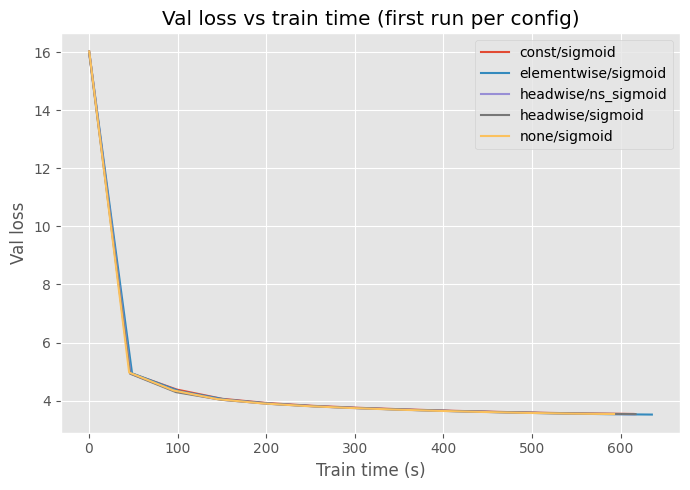

In [129]:
if not log_df.empty and not df.empty:
    curves = log_df.merge(df[['run_id','attn_gate','gate_act','gate_pos']], on='run_id', how='left')
    first_runs = curves.groupby(['attn_gate','gate_act','gate_pos'])['run_id'].transform('min') == curves['run_id']
    plot_df = curves[first_runs]
    fig, ax = plt.subplots(figsize=(7,5))
    for (gate, act, pos), sub in plot_df.groupby(['attn_gate','gate_act','gate_pos']):
        ax.plot(sub['train_time_ms']/1000.0, sub['val_loss'], label=f"{gate}/{act}")
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Val loss')
    ax.set_title('Val loss vs train time (first run per config)')
    ax.legend()
    plt.tight_layout()
else:
    print('No curves to plot; check that logs and results.csv exist.')


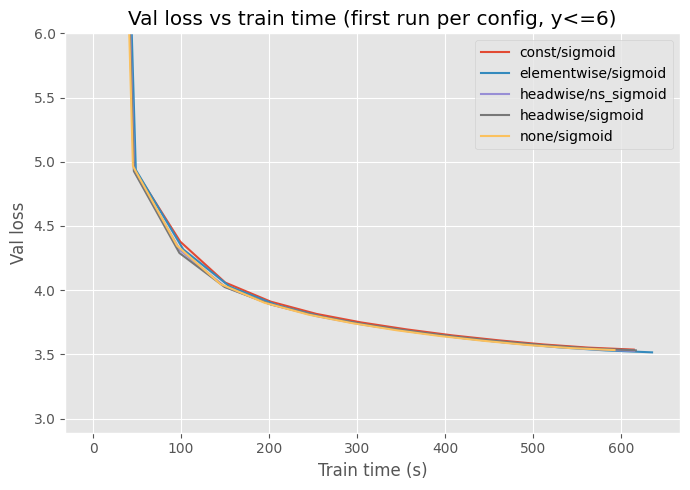

In [130]:
# Zoomed val_loss plot (y-axis capped at 6)
if not log_df.empty and not df.empty:
    curves = log_df.merge(df[['run_id','attn_gate','gate_act','gate_pos']], on='run_id', how='left')
    first_runs = curves.groupby(['attn_gate','gate_act','gate_pos'])['run_id'].transform('min') == curves['run_id']
    plot_df = curves[first_runs]
    fig, ax = plt.subplots(figsize=(7,5))
    for (gate, act, pos), sub in plot_df.groupby(['attn_gate','gate_act','gate_pos']):
        ax.plot(sub['train_time_ms']/1000.0, sub['val_loss'], label=f"{gate}/{act}")
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Val loss')
    ax.set_title('Val loss vs train time (first run per config, y<=6)')
    ax.set_ylim(top=6)
    ax.legend()
    plt.tight_layout()
else:
    print('No curves to plot; check that logs and results.csv exist.')


In [131]:
# Export parsed validation curves
if not plot_df.empty:
    export_path = PROJ_ROOT / 'experiments' / 'log_curves.csv'
    export_path.parent.mkdir(parents=True, exist_ok=True)
    plot_df.to_csv(export_path, index=False)
    print(f'Saved plot_df to {export_path}')
else:
    print('plot_df is empty; nothing to export.')


Saved plot_df to /home/milos/dev/ese-3060-project/experiments/log_curves.csv


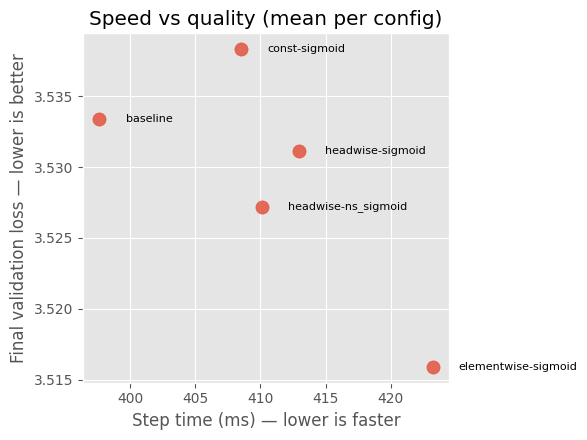

In [135]:
# Speed vs quality (mean per config)
import pandas as pd
if 'df' in globals() and not df.empty:
    group_stats = (
        df.groupby(['attn_gate','gate_pos','gate_act'])
          .agg(mean_val=('final_val_loss','mean'),
               mean_ms=('ms_per_step','mean'),
               n_runs=('final_val_loss','count'))
          .reset_index()
    )
    def _label(row):
        return 'baseline' if row['attn_gate']=='none' else f"{row['attn_gate']}-{row['gate_act']}"
    group_stats['label'] = group_stats.apply(_label, axis=1)
    fig, ax = plt.subplots(figsize=(6, 4.5))
    ax.scatter(group_stats['mean_ms'], group_stats['mean_val'], s=90, alpha=0.8)
    for _, row in group_stats.iterrows():
        ax.text(row['mean_ms'] + 2, row['mean_val'], row['label'], fontsize=8, va='center')
    ax.set_xlabel('Step time (ms) — lower is faster')
    ax.set_ylabel('Final validation loss — lower is better')
    ax.set_title('Speed vs quality (mean per config)')
    plt.tight_layout()
else:
    print('group_stats not available; ensure results.csv is loaded')


baseline mean=3.533365, std=0.000305
                 label  mean_val     delta          z  n_runs
0        const-sigmoid  3.538315 -0.004950 -16.203360       2
1  elementwise-sigmoid  3.515899  0.017467  57.178481       2
2  headwise-ns_sigmoid  3.527213  0.006152  20.139275       2
3     headwise-sigmoid  3.531157  0.002209   7.231064       2
4             baseline  3.533365  0.000000   0.000000       2


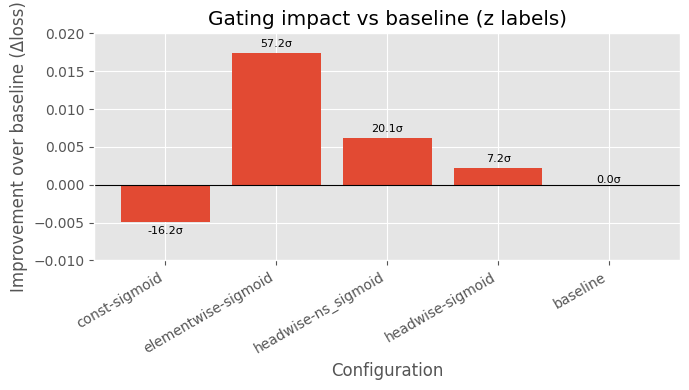

In [133]:
# Improvement vs baseline with ±1σ band
import pandas as pd
import numpy as np
results = pd.read_csv(PROJ_ROOT / 'experiments' / 'results.csv')

baseline = results[results['attn_gate'] == 'none']['final_val_loss']
baseline_mean = baseline.mean()
baseline_std = baseline.std(ddof=1)
eps = 1e-8
baseline_std_safe = baseline_std if baseline_std > 0 else eps
print(f"baseline mean={baseline_mean:.6f}, std={baseline_std:.6f}")

group_stats = (
    results
    .groupby(['attn_gate', 'gate_pos', 'gate_act'])
    .agg(mean_val=('final_val_loss', 'mean'), n_runs=('final_val_loss', 'count'))
    .reset_index()
)

def short_label(row):
    if row['attn_gate'] == 'none':
        return 'baseline'
    return f"{row['attn_gate']}-{row['gate_act']}"

group_stats['label'] = group_stats.apply(short_label, axis=1)
group_stats['delta'] = baseline_mean - group_stats['mean_val']
group_stats['z'] = group_stats['delta'] / baseline_std_safe
print(group_stats[['label','mean_val','delta','z','n_runs']])

fig, ax = plt.subplots(figsize=(7, 4))
x = np.arange(len(group_stats))
ax.bar(x, group_stats['delta'])
ax.set_xticks(x)
ax.set_xticklabels(group_stats['label'], rotation=30, ha='right')
ax.set_ylabel('Improvement over baseline (Δloss)')
ax.set_xlabel('Configuration')
ax.set_title('Gating impact vs baseline (z labels)')
ax.set_ylim(-0.01, 0.02)
ax.axhline(0.0, color='black', linewidth=0.8)
for i, (delta, z) in enumerate(zip(group_stats['delta'], group_stats['z'])):
    ax.text(x[i], delta + np.sign(delta)*0.0005, f"{z:.1f}σ", ha='center', va='bottom' if delta>=0 else 'top', fontsize=8)
plt.tight_layout()
